### Feature Engineering

- 3 - Modeling the dataset.
  - read feather file.
  - create the feature - target.
  - Save feather format.

In [1]:
import feather
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Get start time 
start_time = time.time()

In [3]:
# loading data feather format
df_covid = pd.read_feather('../dataset/feather/featureselection.ftr')
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,ALIVE_OR_DIED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,Died
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,Died
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,Died
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,Died
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,Died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,2,2,2,2,2,7,97,Alive
1048571,1,13,2,2,2,2,51,97,2,2,...,2,1,2,2,2,2,2,7,2,Alive
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,2,2,2,2,2,7,97,Alive
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,2,2,2,2,2,7,97,Alive


In [4]:
# Alternatively X and y can be obtained directly from the dataframe attribute:
X = df_covid.drop('ALIVE_OR_DIED', axis=1) # drop the column target
y = df_covid['ALIVE_OR_DIED'] # target

In [5]:
X_new = SelectKBest(f_classif, k=20).fit_transform(X, y)

In [6]:
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X_new, y, test_size=0.23, random_state=1)

In [7]:
model = RandomForestClassifier(max_depth=15, random_state=0, n_jobs=-1) 

# fitting
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(f'score:....................: {round(accuracy_score(Y_validation, predictions), 4)*100} %')


score:....................: 95.17999999999999 %


In [8]:
list_name_features = []
index = 1

for feat, importance in zip(df_covid.columns, model.feature_importances_):
    importance = round(importance*100, 2)
    print(f'{index} - feature: {feat}, importance: {importance} %')
    list_name_features.append(feat)
    index += 1

1 - feature: USMER, importance: 0.86 %
2 - feature: MEDICAL_UNIT, importance: 3.38 %
3 - feature: SEX, importance: 0.45 %
4 - feature: PATIENT_TYPE, importance: 16.9 %
5 - feature: INTUBED, importance: 28.12 %
6 - feature: PNEUMONIA, importance: 10.32 %
7 - feature: AGE, importance: 13.28 %
8 - feature: PREGNANT, importance: 0.44 %
9 - feature: DIABETES, importance: 1.83 %
10 - feature: COPD, importance: 0.41 %
11 - feature: ASTHMA, importance: 0.29 %
12 - feature: INMSUPR, importance: 0.4 %
13 - feature: HIPERTENSION, importance: 1.43 %
14 - feature: OTHER_DISEASE, importance: 0.48 %
15 - feature: CARDIOVASCULAR, importance: 0.43 %
16 - feature: OBESITY, importance: 0.64 %
17 - feature: RENAL_CHRONIC, importance: 0.61 %
18 - feature: TOBACCO, importance: 0.44 %
19 - feature: CLASIFFICATION_FINAL, importance: 6.37 %
20 - feature: ICU, importance: 12.92 %


In [9]:
#print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))
 
#The importance of a feature is computed as the (normalized) total reduction 
# of the criterion brought by that feature. See scikit learn documentation.
list_feat_importances = list(model.feature_importances_)
dict_feat_importances = {}
#
i=0

for ilist in list_name_features:
    dict_feat_importances[ilist] = list_feat_importances[i]*100 # porcentagem %
    print(f"{ilist}.......: {round(dict_feat_importances[ilist], 2)} %")
    i=i+1

USMER.......: 0.86 %
MEDICAL_UNIT.......: 3.38 %
SEX.......: 0.45 %
PATIENT_TYPE.......: 16.9 %
INTUBED.......: 28.12 %
PNEUMONIA.......: 10.32 %
AGE.......: 13.28 %
PREGNANT.......: 0.44 %
DIABETES.......: 1.83 %
COPD.......: 0.41 %
ASTHMA.......: 0.29 %
INMSUPR.......: 0.4 %
HIPERTENSION.......: 1.43 %
OTHER_DISEASE.......: 0.48 %
CARDIOVASCULAR.......: 0.43 %
OBESITY.......: 0.64 %
RENAL_CHRONIC.......: 0.61 %
TOBACCO.......: 0.44 %
CLASIFFICATION_FINAL.......: 6.37 %
ICU.......: 12.92 %


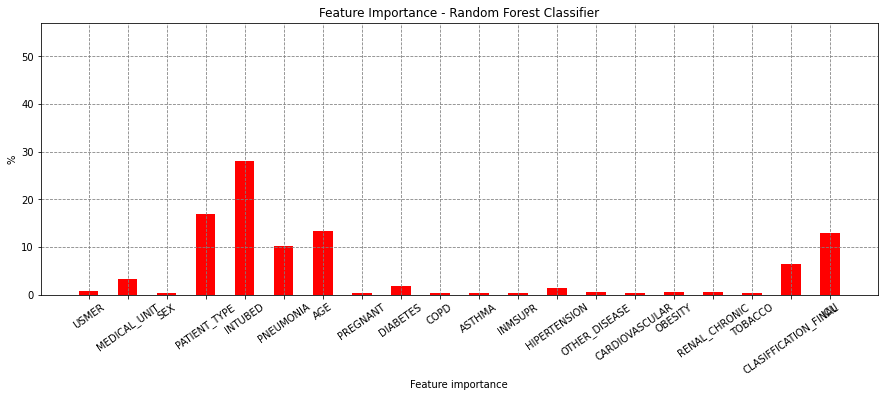

In [10]:
# feature importance
plt.figure(figsize=(15,5))
plt.bar(dict_feat_importances.keys(),dict_feat_importances.values(), width=.5, color='r')
plt.ylim(0,57)
plt.title("Feature Importance - Random Forest Classifier")
plt.ylabel("%")
plt.xlabel("Feature importance")
plt.xticks(rotation=35)
plt.grid(color='gray', linestyle='dashed')
plt.show()

In [11]:
## https://medium.com/analytics-vidhya/catboost-101-fb2fdc3398f3
from catboost import CatBoostClassifier, Pool

cat_model = CatBoostClassifier(
    iterations = 20, # 1000 are ideal
    loss_function='MultiClass',
    bootstrap_type = "Bayesian",
    eval_metric = 'MultiClass',
    leaf_estimation_iterations = 100,
    random_strength = 0.5,
    depth = 7,
    l2_leaf_reg = 5,
    learning_rate=0.1,
    bagging_temperature = 0.5,
    thread_count=-1 # number of threads, setted all CPU cores
    #task_type = "GPU",
)

In [12]:
# training the model
cat_model.fit(X_train,Y_train)

0:	learn: 0.4714075	total: 3.89s	remaining: 1m 13s
1:	learn: 0.3364735	total: 7.43s	remaining: 1m 6s
2:	learn: 0.2581364	total: 14.3s	remaining: 1m 21s
3:	learn: 0.2085150	total: 17.9s	remaining: 1m 11s
4:	learn: 0.1800402	total: 24.4s	remaining: 1m 13s
5:	learn: 0.1610792	total: 30.8s	remaining: 1m 11s
6:	learn: 0.1498683	total: 37.2s	remaining: 1m 9s
7:	learn: 0.1409259	total: 43.3s	remaining: 1m 4s
8:	learn: 0.1353644	total: 49.9s	remaining: 1m 1s
9:	learn: 0.1312210	total: 56.2s	remaining: 56.2s
10:	learn: 0.1278522	total: 1m 3s	remaining: 51.6s
11:	learn: 0.1253261	total: 1m 10s	remaining: 46.9s
12:	learn: 0.1235603	total: 1m 13s	remaining: 39.7s
13:	learn: 0.1217254	total: 1m 17s	remaining: 33.2s
14:	learn: 0.1205056	total: 1m 25s	remaining: 28.5s
15:	learn: 0.1195580	total: 1m 29s	remaining: 22.4s
16:	learn: 0.1186984	total: 1m 36s	remaining: 17s
17:	learn: 0.1178672	total: 1m 42s	remaining: 11.4s
18:	learn: 0.1172416	total: 1m 49s	remaining: 5.74s
19:	learn: 0.1165350	total: 1m

In [13]:
# predicting the model output
y_pred_cat = cat_model.predict(X_validation)
# printing the accuracy of the tuned model
print("accuracy of the catboost: ", round(accuracy_score(Y_validation,y_pred_cat), 4)*100, "%")

accuracy of the catboost:  95.00999999999999 %


In [14]:
#https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [15]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.913


In [16]:
steps = [('over', RandomOverSampler()), ('model', model)]
pipeline = Pipeline(steps=steps)

In [17]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

/home/andsilva/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


F1 Score: 0.895


In [18]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, Y_train)

In [ ]:
y_pred_svc = svc.predict(X_validation)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_svc = confusion_matrix(Y_validation, y_pred_svc)
print (cm_svc)

acc_svc = accuracy_score(Y_validation, y_pred_svc)
print (acc_svc)